<a href="https://colab.research.google.com/github/IB-Ibrahimkhan/R_PROJECT/blob/main/Outlier_Detection_and_Imputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np


In [ ]:
adult_df = pd.read_csv('adult_data.csv',
                       header = None, delimiter=' *, *',engine='python')

adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


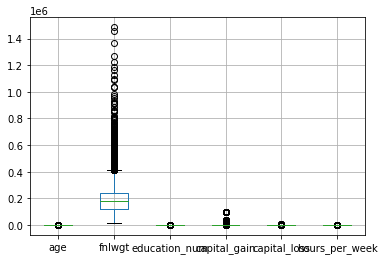

In [ ]:
import matplotlib.pyplot as plt

adult_df.boxplot() #for plotting boxplots for all the numerical columns in the df
plt.show()

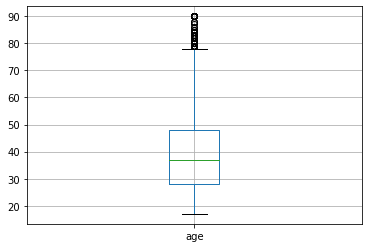

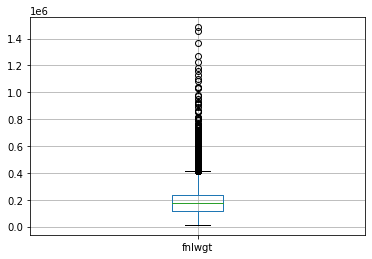

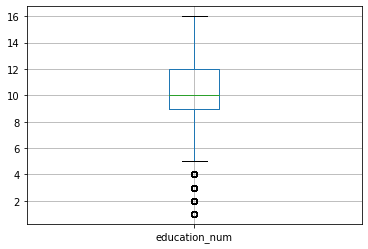

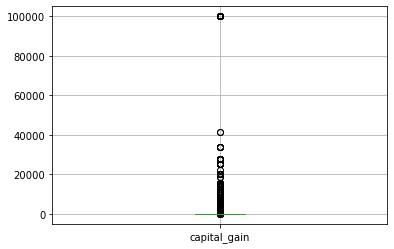

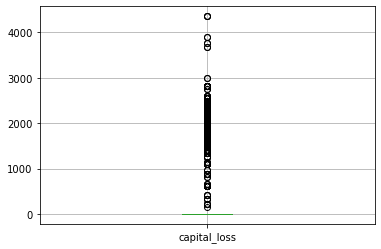

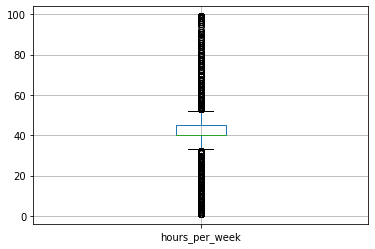

In [ ]:
import matplotlib.pyplot as plt

colname=[]
for x in adult_df.columns[:-1]:
    if adult_df[x].dtype=="int64" or adult_df[x].dtype=="float64":
        colname.append(x)

for x in colname:
    adult_df.boxplot(column=x)
    plt.show()

In [ ]:
adult_df.drop(adult_df[adult_df["capital_gain"]>80000].index,axis=0,inplace=True)

In [ ]:
adult_df.shape

(32402, 15)

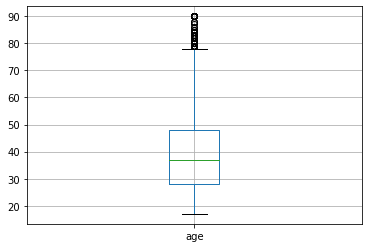

In [ ]:
adult_df.boxplot(column='age') 
plt.show()

In [ ]:
q1 = adult_df['age'].quantile(0.25) #first quartile value
q3 = adult_df['age'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


In [ ]:
adult_df_include = adult_df.loc[(adult_df['age'] >= low) & (adult_df['age'] <= high)] # meeting the acceptable range
adult_df_exclude = adult_df.loc[(adult_df['age'] < low) | (adult_df['age'] > high)] #not meeting the acceptable range


In [ ]:
print(adult_df_include.shape)

(32259, 15)


In [ ]:
print(adult_df_exclude.shape)

(143, 15)


In [ ]:
print(low)

-2.0


In [ ]:
age_mean=int(adult_df_include.age.mean()) #finding the mean of the acceptable range
print(age_mean)

38


In [ ]:
#imputing outlier values with mean value
adult_df_exclude.age=age_mean

In [ ]:
#getting back the original shape of df
adult_df_rev=pd.concat([adult_df_include,adult_df_exclude],axis=0) #concatenating both dfs to get 
#the original shape
adult_df_rev.shape

(32402, 15)

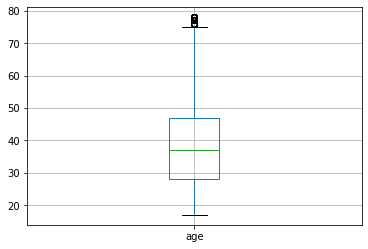

In [ ]:
#adult_df_rev.boxplot(column="age")

In [ ]:
#capping approach

adult_df_exclude.loc[adult_df_exclude["age"] <low, "age"] = low
adult_df_exclude.loc[adult_df_exclude["age"] >high, "age"] = high